In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicLight') # For Windows
print(plt.rcParams['font.family'])
import json  
import cv2
import numpy as np

['NanumGothicLight']


In [3]:
def show_img(data, path, face):    
    img_array = np.fromfile(path, np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    # img = cv2.imread(path, cv2.IMREAD_COLOR)    
    drawing_image = img.copy()
    plt.imshow(cv2.cvtColor(drawing_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.savefig('../data/image_analysis/imagesave/'+face+'facepic.jpg', facecolor='#ffffff', bbox_inches='tight')
    plt.show()

In [66]:
def show_flow(emo, order, face):
    plt.rc('ytick', labelsize=17)  # y축 눈금 폰트 크기
    plt.rc('xtick', labelsize=17)  # x축 눈금 폰트 크기 
    plt.rc('legend', fontsize=17)  # 범례 폰트 크기
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(len(emo), 1, figsize = (20,20))
    # plt.suptitle(face)
    # for idx in range(len(emotion[emo.split(' - ')[0]])):
        # print(emotion[emo.split(' - ')[0]][emo.split(' - ')[1]]['landmark_pair'])
    # print(emotion[emo.split(' - ')[0]][int(emo.split(' - ')[1])]['landmark_pair'])
    output = {}
    for em in emo:
        for la_pair in pair[em]:
            target_list = [i.replace('-', ' - ').replace(' - >','->') for i in la_pair]
            output[target_list[0] + ' <-> ' + target_list[1]] = df[target_list[0]] - df[target_list[1]]
        temp_plot = sns.lineplot(data = output, markers=False, dashes=False, ax=ax[int(em.split(' - ')[1])], palette="tab10")        
        ax[int(em.split(' - ')[1])].axvline(order, 0, 1, color='red', linestyle='--', linewidth=2)
        temp_plot.set_title(emotion[em.split(' - ')[0]][int(em.split(' - ')[1])]['name'], fontsize=30)
    plt.savefig('../data/image_analysis/imagesave/'+face+'.jpg', facecolor='#ffffff', bbox_inches='tight')
    plt.show()

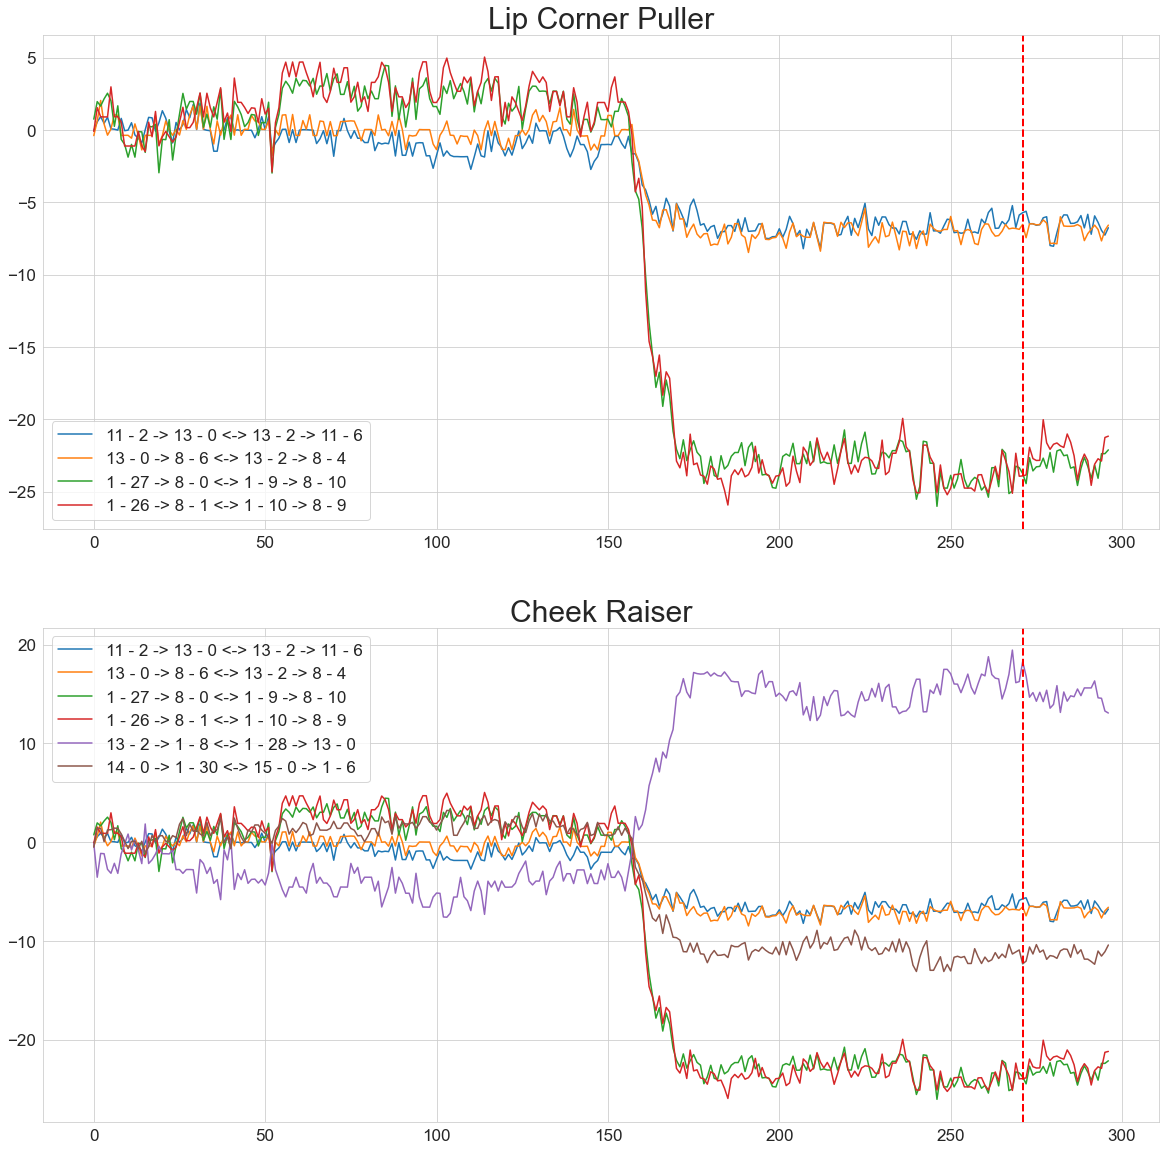

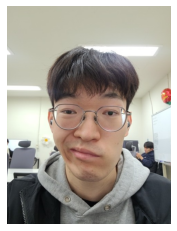

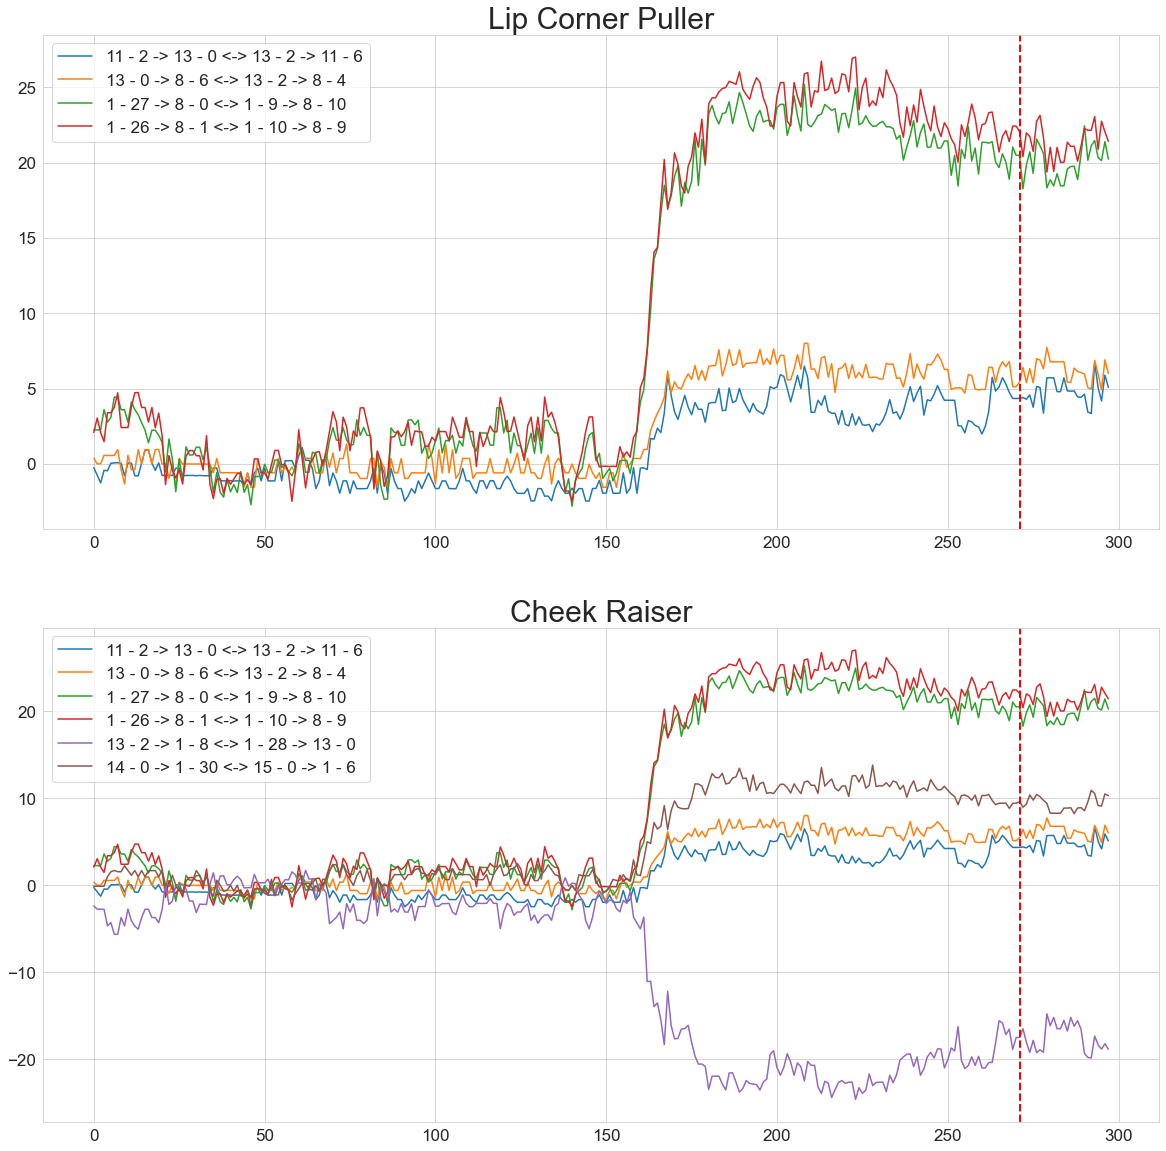

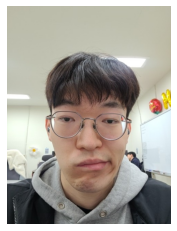

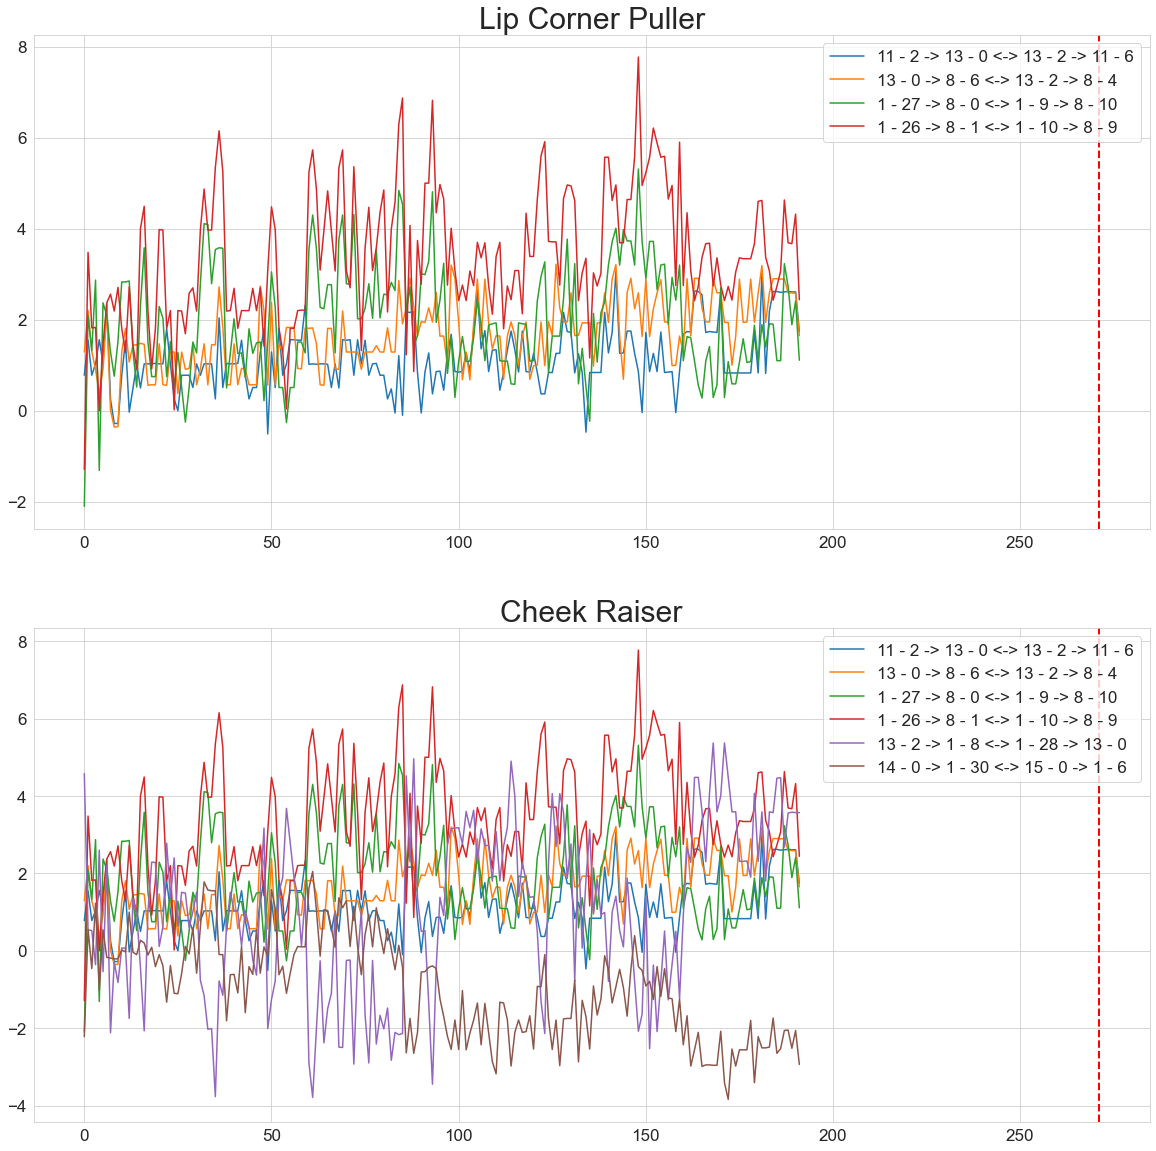

FileNotFoundError: [Errno 2] No such file or directory: '../data/image_analysis/나웃기/271.jpg'

In [68]:
# Happy, Sadness, Surprise, Anger
emo = {'웃기':'Happy',
        '슬픔': 'Sadness',
        '놀람': 'Surprise',
        '화남': 'Anger'}
people_list = ['나오른쪽', '나왼쪽', '나']
emo_kr = '웃기'
image_order = 271
pair = {
    'Happy - 0': [["11-2 -> 13-0","13-2 -> 11-6"], ["13-0 -> 8-6", "13-2 -> 8-4"], ["1-27 -> 8-0", "1-9 -> 8-10"], ["1-26 -> 8-1", "1-10 -> 8-9"]],
    'Happy - 1': [["13-2 -> 1-8", "1-28 -> 13-0"],["14-0 -> 1-30", "15-0 -> 1-6"]],
    'Surprise - 2': [["8-3 -> 11-6","8-7 -> 11-2"], ["8-4 -> 11-5", "8-6 -> 11-3"]],
    'Anger - 2' : [["8-1 -> 12-0", "8-9 -> 12-0"]],
    'Anger - 3': [["11-2 -> 13-0", "11-6 -> 13-2"]]
    }
for fa in people_list:
    face = fa + emo_kr
    df = pd.read_csv('../data/image_analysis/'+face+'/'+face+'.csv')
    with open('../data/image_analysis/emotion_rule_weight.json', 'r') as f:
        emotion = json.load(f)
    
    # if '오른쪽' in fa:
    #     right = df
    #     print("오른쪽")
    #     show_img(df, '../data/image_analysis/'+face+'/' + str(image_order) + '.jpg', face)
    # elif '왼쪽' in fa:
    #     left = df
    #     print("왼쪽")
    pick = [i for i in list(pair.keys()) if emo[emo_kr] in i]
    show_flow(pick, image_order, face)
    show_img(df, '../data/image_analysis/'+face+'/' + str(image_order) + '.jpg', face)
    # print(pd.DataFrame(df.iloc[image_order]).to_dict()[image_order])
